In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

        Time  Pressure    TC  AmbientT  AmbientV
0          0      0.51  2.92     42.57       693
1          1      0.51  2.83     26.45       528
2          3      0.51  2.83     25.31       515
3          5      0.49  1.30     23.30       492
4          6      0.51  3.83     24.78       509
...      ...       ...   ...       ...       ...
50952  82789      0.53  7.71     27.78       543
50953  82790      0.53  6.53     27.78       543
50954  82792      0.53  6.80     27.52       540
50955  82794      0.53  5.09     26.72       531
50956  82795      0.53  4.37     26.63       530

[50957 rows x 5 columns]


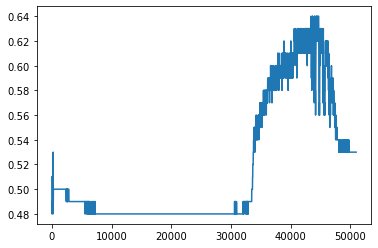

In [4]:
path = "20230914_1810_data.CSV"
# Date is YYYYMMDD_HHMM
df = pd.read_csv(path,header=None, sep=',')
df.columns = ['Time', 'Pressure', 'TC', 'AmbientT', 'AmbientV']
# Time in sec, pressure in V, TC (= thermocouple) in mV, AmbientT in C and AmbientV in mV 
#print(df['Pressure])

# Convert miliseconds from arduino to seconds
df['Time'] = pd.to_numeric(df['Time'], errors='coerce') 
#df['Time'] = df['Time'] / 1000 #Time in seconds

#Convert voltaga reading from sensor to kPa
#df['Pressure'] = ((df['Pressure']/1023)-0.04)/0.009
Pmax = 5 #PSS
#df['Pressure'] = (df['Pressure']*2*Pmax/4)*6.895e3 # Pa
#df['Pressure'] =((df['Pressure'] -2.5)/5)*1e5# Pa

# Display the first few rows of the DataFrame
print(df)
plt.plot(df['Pressure'])


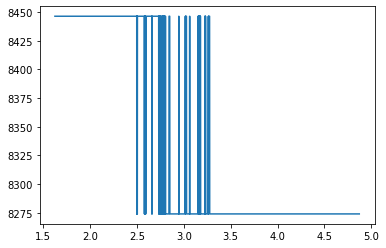

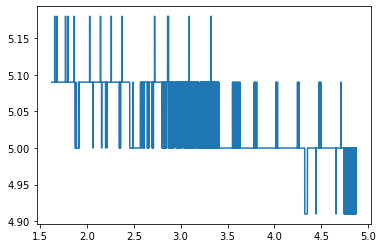

In [17]:
slice_start = 3600
n_hours = 2
slice_end=slice_start+n_hours*3600
plt.plot(df['Time'][slice_start:slice_end]/3600,df['Pressure'][slice_start:slice_end])
plt.show()

plt.plot(df['Time'][slice_start:slice_end]/3600,df['TC'][slice_start:slice_end])